In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score










In [47]:
# Generate some dummy data
X = np.random.rand(1000, 14)  # Input data
y = np.random.randint(0, 2, 1000)  # Target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This line generates an array of random integers (either 0 or 1) with 1000 elements, which is then used as the target labels for the model training. So, the array you are seeing as output is the y array, which contains the target labels for the classification.

In [48]:
y

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [49]:
X_train.shape


(800, 14)

In [50]:
X_test.shape


(200, 14)

In [51]:
y_train.shape


(800,)

In [52]:
y_test.shape

(200,)

In [53]:
# Scale the input data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [54]:
# Varying dimensionality of the problem
dimensions = [2, 5, 7, 10]  # Dimensionality values to test
test_accuracy = []

In [55]:
for dim in dimensions:
    # Train the autoencoder
    autoencoder = MLPRegressor(hidden_layer_sizes=[dim], activation='relu', solver='adam', max_iter=1000)
    autoencoder.fit(X_train, X_train)

    # Reduce dimensionality with the trained autoencoder

    reduced_X_train = autoencoder.predict(X_train)
    reduced_X_test = autoencoder.predict(X_test)

    # Train a classifier on the reduced-dimensional data
    classifier = MLPRegressor(hidden_layer_sizes=[10], activation='relu', solver='adam', max_iter=1000)
    classifier.fit(reduced_X_train, y_train)

    # Evaluate the classifier on the test set
    y_pred = classifier.predict(reduced_X_test)
    y_pred_labels = np.round(y_pred)  # Assuming binary classification
    acc = accuracy_score(y_test, y_pred_labels)
    test_accuracy.append(acc)

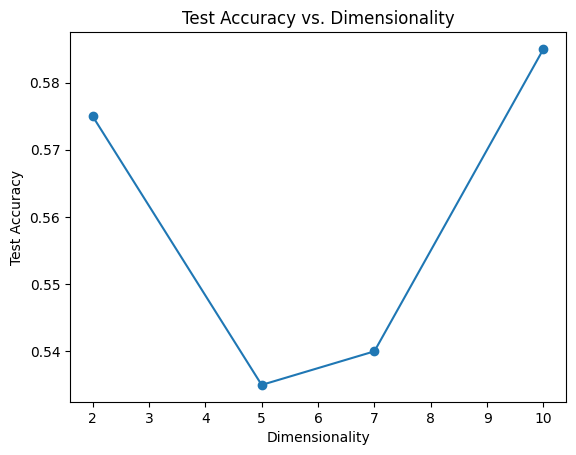

In [56]:

# Plot the test accuracy vs. dimensionality
plt.plot(dimensions, test_accuracy, marker='o')
plt.xlabel('Dimensionality')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Dimensionality')
plt.show()